In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [3]:
wordsList = np.load('./training_data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist()  # Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList]  # Encode words as UTF-8
wordVectors = np.load('./training_data/wordVectors.npy')
print('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [4]:
print(len(wordsList))  # 词映射
print(wordVectors.shape)  # 实际词向量

400000
(400000, 50)


In [5]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

In [6]:
maxSeqLength = 10   # Maximum length of sentence
numDimensions = 300   # Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index('i')
firstSentence[1] = wordsList.index('thought')
firstSentence[2] = wordsList.index('the')
firstSentence[3] = wordsList.index('movie')
firstSentence[4] = wordsList.index('was')
firstSentence[5] = wordsList.index('incredible')
firstSentence[6] = wordsList.index('and')
firstSentence[7] = wordsList.index('inspiring')
# firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence)   # Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [22]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors, firstSentence).eval()) 

[[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
  -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
   1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
   3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
   5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
  -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
  -2.6671e-01  9.2121e-01]
 [ 4.2762e-01 -1.1469e-01  1.0506e-02 -5.4662e-01  8.9055e-01  1.9263e-01
  -6.5374e-01  8.7461e-02 -6.9830e-01  2.8020e-01  1.7176e-01  3.1886e-01
  -4.6253e-01 -1.3414e-01  6.2070e-01  3.3603e-01  4.7793e-01 -4.6861e-02
  -4.5179e-01 -3.2765e-01 -7.3017e-01  4.1449e-01  5.6783e-01  3.8010e-02
   1.0140e+00 -1.8850e+00 -9.4402e-01  6.5002e-02  5.4992e-01 -4.6939e-01
   2.7234e+

In [8]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['./training_data/positiveReviews/' + f for f in listdir('./training_data/positiveReviews/') if isfile(join('./training_data/positiveReviews/', f))]
negativeFiles = ['./training_data/negativeReviews/' + f for f in listdir('./training_data/negativeReviews/') if isfile(join('./training_data/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())  # 按空格分隔
        numWords.append(counter)
print('Positive files finished')
 
for nf in negativeFiles:
    with open(nf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        numWords.append(counter)
print('Negative files finished')
 
numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords) / len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


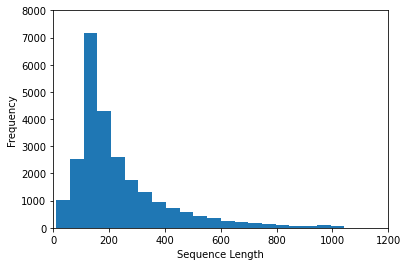

In [10]:
import matplotlib.pyplot as plt
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [11]:
maxSeqLength = 250

In [12]:
fname = positiveFiles[0]   # Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [13]:
# 删除标点符号、括号、问号等，只留下字母数字字符
import re
strip_special_chars = re.compile('[^A-Za-z0-9 ]+')
 
def cleanSentences(string):
    string = string.lower().replace('<br />', ' ')  # 把换行符替换成空格
    return re.sub(strip_special_chars, '', string.lower()) # 按照strip_special_chars规则，把string中的值替换成空，即删除

In [14]:
# 长度未到250,0填充；大于250，去掉多余的
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line = f.readline()
    cleanedLine = cleanSentences(line)
    print(cleanedLine)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:  # 若找不到词
            firstFile[indexCounter] = 399999  # Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell highs satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled  at  high a classic line inspector im here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isnt


array([174943,    152,     14,      7,   7362,   2841,     20,   1421,
           22, 201534,    215,     79,     19,     77,     68,   1009,
           59,    164,    214,    125,     19,   2562,    192,   1678,
           82,      6, 201534,   3174,   8104,    410,    285,      4,
          733,     12, 174943,   7984,  15303,     14,    181,   2386,
            4,   2532,     73,     14,   2562, 201534,  14170,      4,
         3981,   7980, 201534,  34401,    543,     38,     86,    253,
          248,    131,     44,  22495,   2562,  31166, 201534,  91887,
            3, 201534,   1115,    794,     64,   9794,    285,      3,
       201534,    888,     41,   1522,      5,     44,    543,     61,
           41,    822, 201534,   1942,      6,     42,      7,   1283,
         2648,    977,      4,   6292,    135, 201534,    164,     41,
         1040,   3151,     22,    152,      7,   2392,    331,   5537,
        14663,    187,      4,  11739,     48,      3,    392,   2562,
      

In [15]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0
for pf in positiveFiles:
    with open(pf, 'r', encoding='UTF-8') as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1
        
for nf in negativeFiles:
    with open(nf, 'r', encoding='UTF-8') as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1
        
np.save('idsMatrix', ids)

In [17]:
ids = np.load('./idsMatrix.npy')
ids

array([[174943,    152,     14, ...,      0,      0,      0],
       [ 26494,     46, 399999, ...,      7,    787,     21],
       [  6520, 129559,     21, ...,      0,      0,      0],
       ...,
       [    41,    822,   6556, ...,      6, 201534,  25939],
       [    77,   1588,     12, ...,      0,      0,      0],
       [    37,     14,     48, ...,      0,      0,      0]])

In [18]:
from random import randint
 
def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)  # 产生[1,11499]范围内一个整数型随机数
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels
 
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [19]:
batchSize = 24
lstmUnits = 64  # 隐层神经元个数
numClasses = 2  # 2分类
iterations = 50000  # 迭代次数

In [20]:
# 清除默认图形堆栈并重置全局默认图形
tf.reset_default_graph()
 
labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [23]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]), dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors, input_data)  # input_data的每个id对应一个wordVectors中的向量，利用embedding_lookup查找

In [26]:
lstmCell = tf.nn.rnn_cell.BasicLSTMCell(lstmUnits)
lstmCell = tf.nn.rnn_cell.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)  # 返回value，最终输出值

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
#  全连接层
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])  # 将矩阵value转置成[1, 0, 2]
# 取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) -1)  # last为最后神经元结果值
prediction = (tf.matmul(last, weight) + bias)

In [28]:
correctPred = tf.equal(tf.arg_max(prediction, 1), tf.arg_max(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [29]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [30]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
 
for i in range(iterations):
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
    
    if(i % 1000 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})  # 改成get TestBatch
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        print('iteration {}/{}...'.format(i+1, iterations),
             'loss {}...'.format(loss_),
             'accuracy {}...'.format(accuracy_))
    if(i % 10000 == 0 and i != 0):
        save_path  = saver.save(sess, './training_data/models/pretrained_lstm.ckpt', global_step = i)
        print('saved to %s' % save_path)

KeyboardInterrupt: 

In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('./training_data/models'))

In [ ]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)